<a href="https://colab.research.google.com/github/connectkishan1/Fashion-Recommendation/blob/master/Kishan(Asst2)fashion_mnist_Deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import load_model
model=load_model('/content/drive/My Drive/Colab Notebooks/Kishan(Asst2)fashion mnist.h5')












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 8)           1608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [ ]:
filters,bias=model.layers[0].get_weights()
print(filters.shape)


(5, 5, 1, 8)


In [ ]:
for layer in model.layers:
  print(layer.name)
  #if 'Conv' in not layer 

Conv1
max_pooling2d_1
Conv2
max_pooling2d_2
flatten_1
dense_1
dense_2
dense_3


before reshappingf (5, 5, 1)
after reshapping: (5, 5)


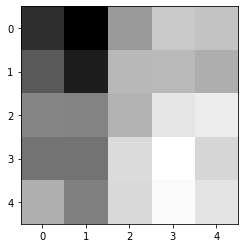

In [ ]:
import matplotlib.pyplot as plt
f=filters[:,:,:,0]
print("before reshappingf",f.shape)
f=f.reshape(f.shape[0],f.shape[1])
print("after reshapping:",f.shape)
pyplot.imshow(f,cmap="gray")
pyplot.show()

In [ ]:
!wget --output-document="kk.jpg" https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTnF4Q6jeij7b_CgmYDB1pGftPVNzWiV5KQXoK3i70o8UWSg4pv


--2020-02-06 05:36:06--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTnF4Q6jeij7b_CgmYDB1pGftPVNzWiV5KQXoK3i70o8UWSg4pv
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.126.102, 108.177.126.113, 108.177.126.138, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.126.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3650 (3.6K) [image/jpeg]
Saving to: ‘kk.jpg’

kk.jpg              100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-02-06 05:36:06 (64.8 MB/s) - ‘kk.jpg’ saved [3650/3650]



In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('/content/kk.jpg',target_size=(28,28))
print(img.size)
#img.show()

(28, 28)


In [ ]:
img_array=img_to_array(img)

In [ ]:
print(img_array.shape)

(28, 28, 3)


(28, 28)


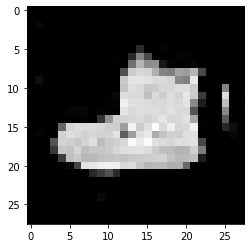

In [ ]:
p=img_array[:,:,1]
print(p.shape)
p=250-p
pyplot.imshow(p,cmap="gray")

In [ ]:
p=p.reshape(p.shape[0],p.shape[1],1)
p.shape

(28, 28, 1)

In [ ]:
#for precison
p=p.astype('float')
p=p.reshape(1,p.shape[0],p.shape[1],1) #reshaped in 4d added before P.shape[0]

"""#another way of expand dimention
from numpy import expand_dims
p_expand=expand_dims(p_reshape,axis=0)
print(p_expand.shape)"""

p=p/255
print(p.shape)

(1, 28, 28, 1)


In [ ]:
model.predict(p)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model.predict_classes(p)

array([5])